# Sampling, Law of Large Numbers & Central Limit Theorem: A Complete Guide

## Table of Contents
1. [Introduction to Sampling](#intro)
2. [Random Variables and Distributions](#distributions)
3. [Sampling Methods](#sampling-methods)
4. [Sample Statistics](#statistics)
5. [Law of Large Numbers (LLN)](#lln)
6. [Central Limit Theorem (CLT)](#clt)
7. [Confidence Intervals](#confidence)
8. [Hypothesis Testing](#hypothesis)
9. [Practical Applications](#applications)

---

## 1. Introduction to Sampling <a id='intro'></a>

**Sampling** is the foundation of statistical inference. It allows us to:
- Make inferences about populations from smaller samples
- Conduct experiments efficiently
- Understand uncertainty and variability
- Build predictive models

### Key Concepts:

**Population** ($\mathcal{P}$): The complete set of all items of interest
- Example: All voters in a country, all products in a factory

**Sample** ($\mathcal{S}$): A subset of the population selected for study
- Example: 1000 voters surveyed, 100 products tested

**Parameter** ($\theta$): A numerical characteristic of the population
- Examples: Population mean ($\mu$), population variance ($\sigma^2$)
- Usually unknown and what we want to estimate

**Statistic**: A numerical characteristic of the sample
- Examples: Sample mean ($\bar{x}$), sample variance ($s^2$)
- Used to estimate population parameters

### Why Sample?

1. **Cost-effective**: Cheaper than studying entire population
2. **Time-efficient**: Faster data collection
3. **Practical**: Sometimes impossible to measure entire population
4. **Destructive testing**: Some tests destroy the item (e.g., crash tests)

### The Big Questions:

1. How well does a sample represent the population?
2. How do sample statistics relate to population parameters?
3. How certain can we be about our estimates?

**The Law of Large Numbers** and **Central Limit Theorem** answer these questions!

In [20]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, uniform, expon, binom, poisson, chi2, t as t_dist
import pandas as pd
from matplotlib.patches import Rectangle
import warnings
import scipy

# Set styles
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"SciPy version: {scipy.__version__}")
print("\nReady to explore the fascinating world of sampling and probability!")

Libraries imported successfully!
NumPy version: 2.0.2
SciPy version: 1.16.3

Ready to explore the fascinating world of sampling and probability!


## 2. Random Variables and Distributions <a id='distributions'></a>

### Random Variables

A **random variable** is a variable whose value is determined by the outcome of a random phenomenon.

**Discrete Random Variable**: Takes countable values
- Examples: Number of heads in coin flips, number of customers
- Described by Probability Mass Function (PMF): $P(X = x)$

**Continuous Random Variable**: Takes any value in an interval
- Examples: Height, weight, temperature
- Described by Probability Density Function (PDF): $f(x)$
- $P(a \leq X \leq b) = \int_a^b f(x)dx$

### Key Properties:

**Expected Value (Mean)**:
$$E[X] = \mu = \begin{cases} 
\sum_x x \cdot P(X=x) & \text{discrete} \\
\int_{-\infty}^{\infty} x \cdot f(x)dx & \text{continuous}
\end{cases}$$

**Variance**:
$$\text{Var}(X) = \sigma^2 = E[(X - \mu)^2] = E[X^2] - (E[X])^2$$

**Standard Deviation**:
$$\sigma = \sqrt{\text{Var}(X)}$$

### Common Distributions:

1. **Normal (Gaussian)**: $X \sim N(\mu, \sigma^2)$
2. **Uniform**: $X \sim U(a, b)$
3. **Exponential**: $X \sim \text{Exp}(\lambda)$
4. **Binomial**: $X \sim \text{Bin}(n, p)$
5. **Poisson**: $X \sim \text{Pois}(\lambda)$

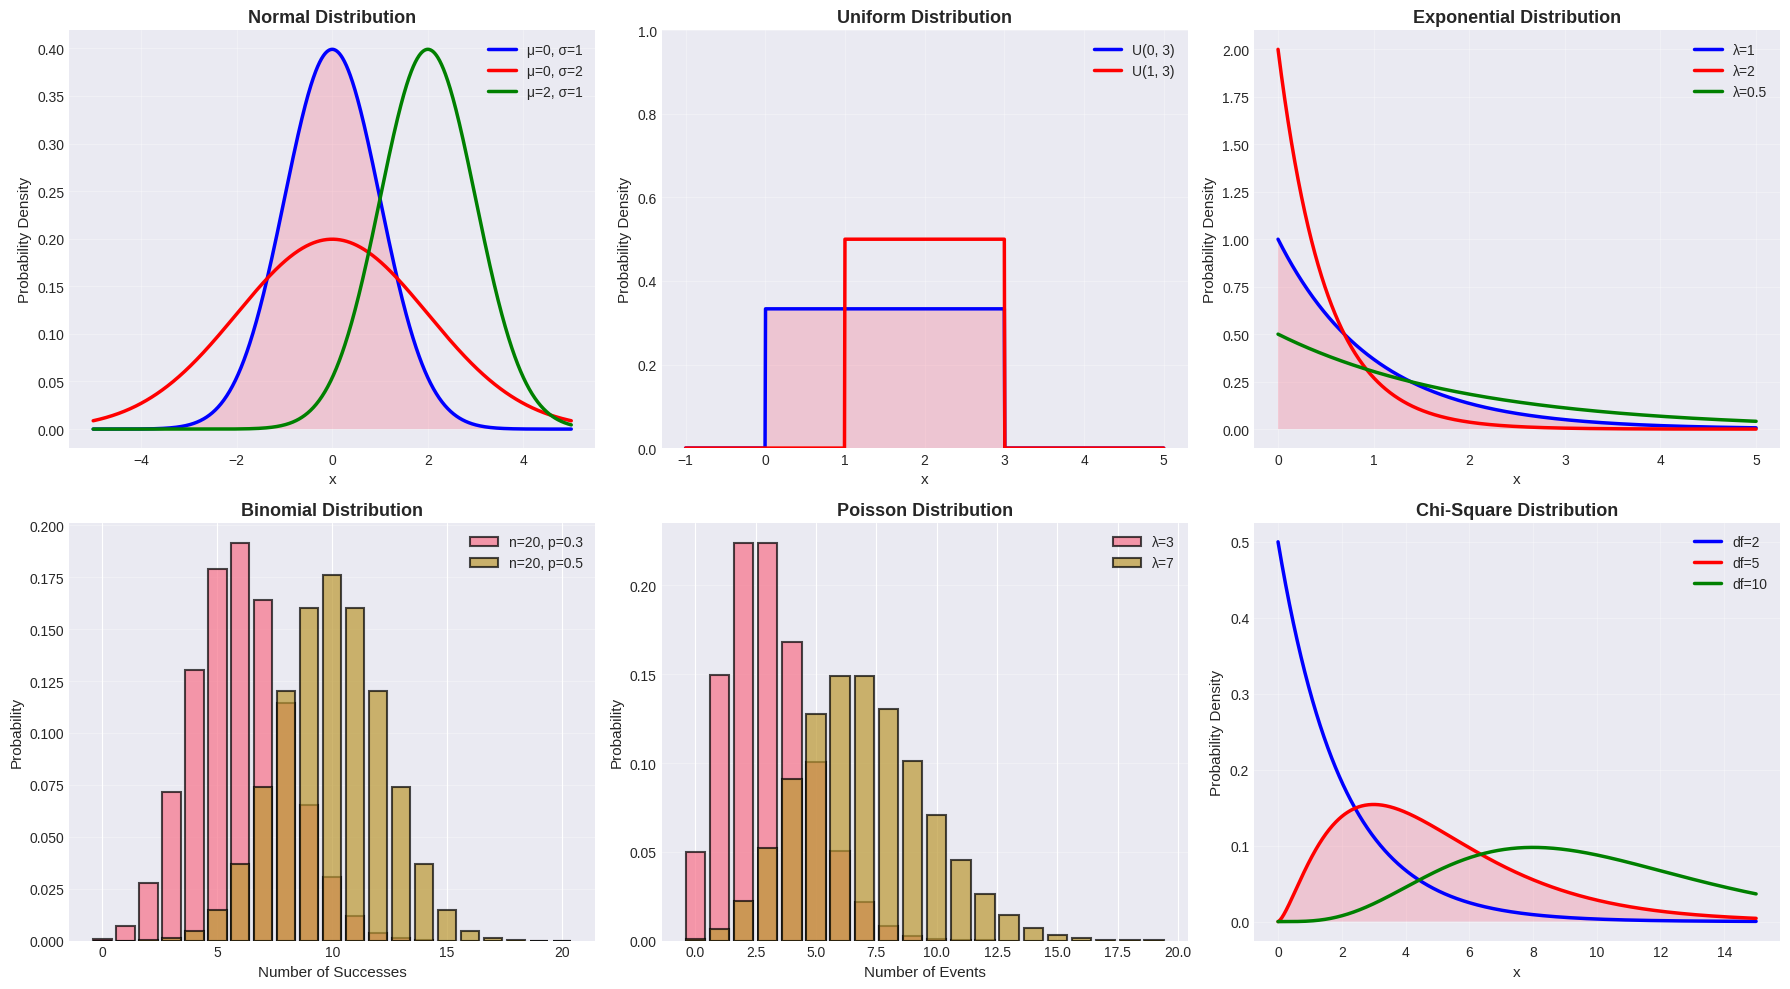

Common Probability Distributions:
   • Normal: Bell-shaped, symmetric, used for many natural phenomena
   • Uniform: All values equally likely
   • Exponential: Models time between events
   • Binomial: Number of successes in n trials
   • Poisson: Number of rare events in fixed interval
   • Chi-Square: Sum of squared normal variables


In [21]:
# Visualize common probability distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

# 1. Normal Distribution
x_norm = np.linspace(-5, 5, 1000)
axes[0].plot(x_norm, norm.pdf(x_norm, 0, 1), 'b-', linewidth=2.5, label='μ=0, σ=1')
axes[0].plot(x_norm, norm.pdf(x_norm, 0, 2), 'r-', linewidth=2.5, label='μ=0, σ=2')
axes[0].plot(x_norm, norm.pdf(x_norm, 2, 1), 'g-', linewidth=2.5, label='μ=2, σ=1')
axes[0].fill_between(x_norm, norm.pdf(x_norm, 0, 1), alpha=0.3)
axes[0].set_title('Normal Distribution', fontsize=13, fontweight='bold')
axes[0].set_xlabel('x', fontsize=11)
axes[0].set_ylabel('Probability Density', fontsize=11)
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# 2. Uniform Distribution
x_unif = np.linspace(-1, 5, 1000)
axes[1].plot(x_unif, uniform.pdf(x_unif, 0, 3), 'b-', linewidth=2.5, label='U(0, 3)')
axes[1].plot(x_unif, uniform.pdf(x_unif, 1, 2), 'r-', linewidth=2.5, label='U(1, 3)')
axes[1].fill_between(x_unif, uniform.pdf(x_unif, 0, 3), alpha=0.3)
axes[1].set_title('Uniform Distribution', fontsize=13, fontweight='bold')
axes[1].set_xlabel('x', fontsize=11)
axes[1].set_ylabel('Probability Density', fontsize=11)
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim([0, 1])

# 3. Exponential Distribution
x_exp = np.linspace(0, 5, 1000)
axes[2].plot(x_exp, expon.pdf(x_exp, scale=1), 'b-', linewidth=2.5, label='λ=1')
axes[2].plot(x_exp, expon.pdf(x_exp, scale=0.5), 'r-', linewidth=2.5, label='λ=2')
axes[2].plot(x_exp, expon.pdf(x_exp, scale=2), 'g-', linewidth=2.5, label='λ=0.5')
axes[2].fill_between(x_exp, expon.pdf(x_exp, scale=1), alpha=0.3)
axes[2].set_title('Exponential Distribution', fontsize=13, fontweight='bold')
axes[2].set_xlabel('x', fontsize=11)
axes[2].set_ylabel('Probability Density', fontsize=11)
axes[2].legend(fontsize=10)
axes[2].grid(True, alpha=0.3)

# 4. Binomial Distribution
x_binom = np.arange(0, 21)
axes[3].bar(x_binom, binom.pmf(x_binom, 20, 0.3), alpha=0.7, label='n=20, p=0.3', 
           edgecolor='black', linewidth=1.5)
axes[3].bar(x_binom, binom.pmf(x_binom, 20, 0.5), alpha=0.7, label='n=20, p=0.5',
           edgecolor='black', linewidth=1.5)
axes[3].set_title('Binomial Distribution', fontsize=13, fontweight='bold')
axes[3].set_xlabel('Number of Successes', fontsize=11)
axes[3].set_ylabel('Probability', fontsize=11)
axes[3].legend(fontsize=10)
axes[3].grid(True, alpha=0.3, axis='y')

# 5. Poisson Distribution
x_pois = np.arange(0, 20)
axes[4].bar(x_pois, poisson.pmf(x_pois, 3), alpha=0.7, label='λ=3',
           edgecolor='black', linewidth=1.5)
axes[4].bar(x_pois, poisson.pmf(x_pois, 7), alpha=0.7, label='λ=7',
           edgecolor='black', linewidth=1.5)
axes[4].set_title('Poisson Distribution', fontsize=13, fontweight='bold')
axes[4].set_xlabel('Number of Events', fontsize=11)
axes[4].set_ylabel('Probability', fontsize=11)
axes[4].legend(fontsize=10)
axes[4].grid(True, alpha=0.3, axis='y')

# 6. Chi-Square Distribution
x_chi = np.linspace(0, 15, 1000)
axes[5].plot(x_chi, chi2.pdf(x_chi, df=2), 'b-', linewidth=2.5, label='df=2')
axes[5].plot(x_chi, chi2.pdf(x_chi, df=5), 'r-', linewidth=2.5, label='df=5')
axes[5].plot(x_chi, chi2.pdf(x_chi, df=10), 'g-', linewidth=2.5, label='df=10')
axes[5].fill_between(x_chi, chi2.pdf(x_chi, df=5), alpha=0.3)
axes[5].set_title('Chi-Square Distribution', fontsize=13, fontweight='bold')
axes[5].set_xlabel('x', fontsize=11)
axes[5].set_ylabel('Probability Density', fontsize=11)
axes[5].legend(fontsize=10)
axes[5].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Common Probability Distributions:")
print("   • Normal: Bell-shaped, symmetric, used for many natural phenomena")
print("   • Uniform: All values equally likely")
print("   • Exponential: Models time between events")
print("   • Binomial: Number of successes in n trials")
print("   • Poisson: Number of rare events in fixed interval")
print("   • Chi-Square: Sum of squared normal variables")

## 3. Sampling Methods <a id='sampling-methods'></a>

Different situations require different sampling strategies:

### 1. Simple Random Sampling
Every member of the population has an equal chance of being selected.
- **Pros**: Unbiased, simple to understand
- **Cons**: May not capture rare subgroups

### 2. Stratified Sampling
Population divided into strata (groups), then random samples from each stratum.
- **Pros**: Ensures representation of all subgroups
- **Cons**: Requires knowledge of population structure

### 3. Systematic Sampling
Select every k-th member after random start.
- **Pros**: Easy to implement, spreads sample across population
- **Cons**: Can be biased if there's periodicity

### 4. Cluster Sampling
Population divided into clusters, randomly select clusters, sample all members.
- **Pros**: Cost-effective for geographically dispersed populations
- **Cons**: Higher sampling error

### 5. Bootstrap Sampling
Resample with replacement from observed data.
- **Pros**: Estimates sampling distribution without assumptions
- **Cons**: Computationally intensive

### Sampling with vs. without Replacement

**With Replacement**: Item returned to population after selection
- Each draw is independent
- Sample can contain duplicates

**Without Replacement**: Item not returned
- Draws are dependent
- No duplicates in sample

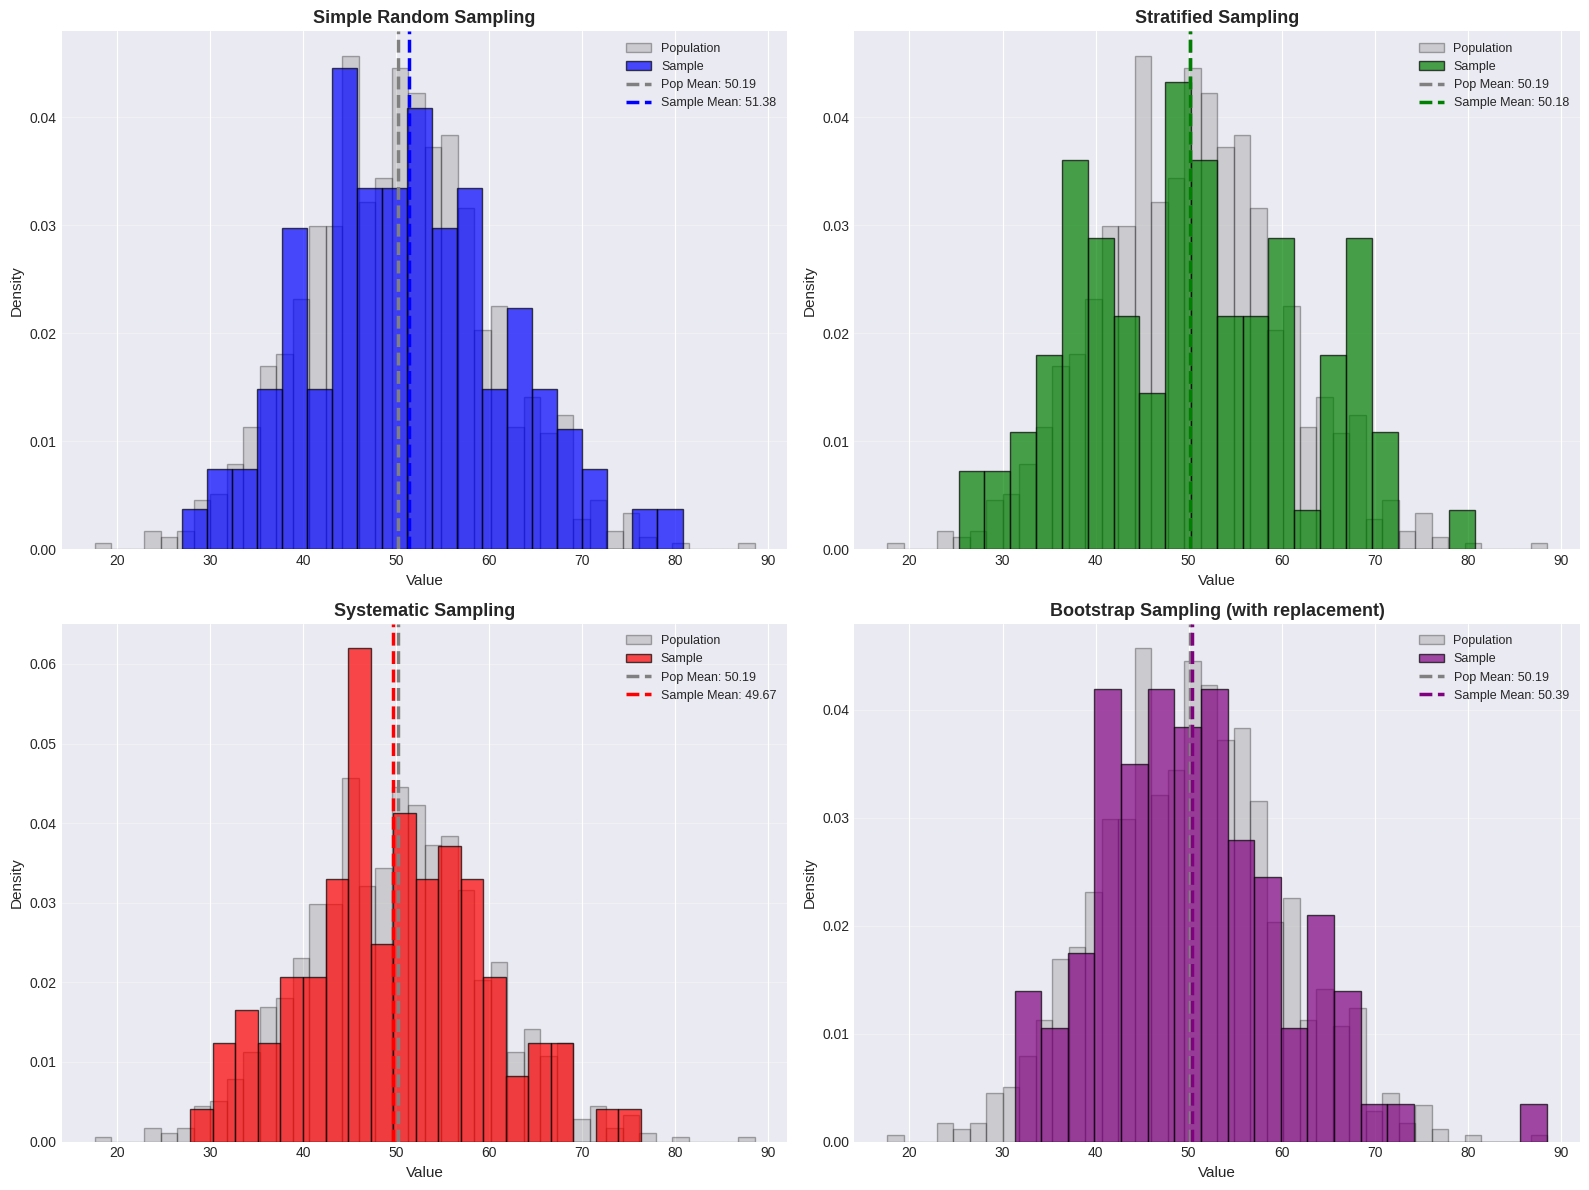


Sampling Method Comparison:
Population: Mean = 50.19, Std = 9.79

Sample Statistics:

Simple Random Sampling:
  Mean: 51.38 (Error: 1.19)
  Std:  10.38 (Error: 0.60)
  Size: 100

Stratified Sampling:
  Mean: 50.18 (Error: 0.02)
  Std:  11.89 (Error: 2.11)
  Size: 100

Systematic Sampling:
  Mean: 49.67 (Error: 0.52)
  Std:  9.72 (Error: 0.07)
  Size: 100

Bootstrap Sampling (with replacement):
  Mean: 50.39 (Error: 0.20)
  Std:  10.06 (Error: 0.28)
  Size: 100


In [22]:
# Demonstrate different sampling methods

# Create a population
np.random.seed(42)
population_size = 1000
population = np.random.normal(loc=50, scale=10, size=population_size)

sample_size = 100

# 1. Simple Random Sampling
simple_random_sample = np.random.choice(population, size=sample_size, replace=False)

# 2. Stratified Sampling
# Create strata based on value ranges
strata_boundaries = [0, 40, 50, 60, 100]
stratified_sample = []
samples_per_stratum = sample_size // (len(strata_boundaries) - 1)

for i in range(len(strata_boundaries) - 1):
    stratum = population[(population >= strata_boundaries[i]) & 
                        (population < strata_boundaries[i+1])]
    if len(stratum) > 0:
        stratum_sample = np.random.choice(stratum, 
                                         size=min(samples_per_stratum, len(stratum)), 
                                         replace=False)
        stratified_sample.extend(stratum_sample)
stratified_sample = np.array(stratified_sample)

# 3. Systematic Sampling
k = population_size // sample_size
start = np.random.randint(0, k)
systematic_sample = population[start::k][:sample_size]

# 4. Bootstrap Sample (with replacement)
bootstrap_sample = np.random.choice(population, size=sample_size, replace=True)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

samples = [
    (simple_random_sample, 'Simple Random Sampling', 'blue'),
    (stratified_sample, 'Stratified Sampling', 'green'),
    (systematic_sample, 'Systematic Sampling', 'red'),
    (bootstrap_sample, 'Bootstrap Sampling (with replacement)', 'purple')
]

for idx, (sample, title, color) in enumerate(samples):
    # Histogram comparison
    axes[idx].hist(population, bins=40, alpha=0.3, label='Population', 
                  color='gray', edgecolor='black', density=True)
    axes[idx].hist(sample, bins=20, alpha=0.7, label='Sample', 
                  color=color, edgecolor='black', density=True)
    
    # Add vertical lines for means
    axes[idx].axvline(population.mean(), color='gray', linestyle='--', 
                     linewidth=2.5, label=f'Pop Mean: {population.mean():.2f}')
    axes[idx].axvline(sample.mean(), color=color, linestyle='--', 
                     linewidth=2.5, label=f'Sample Mean: {sample.mean():.2f}')
    
    axes[idx].set_title(title, fontsize=13, fontweight='bold')
    axes[idx].set_xlabel('Value', fontsize=11)
    axes[idx].set_ylabel('Density', fontsize=11)
    axes[idx].legend(fontsize=9)
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nSampling Method Comparison:")
print("="*70)
print(f"Population: Mean = {population.mean():.2f}, Std = {population.std():.2f}")
print("\nSample Statistics:")
for sample, title, _ in samples:
    print(f"\n{title}:")
    print(f"  Mean: {sample.mean():.2f} (Error: {abs(sample.mean() - population.mean()):.2f})")
    print(f"  Std:  {sample.std():.2f} (Error: {abs(sample.std() - population.std()):.2f})")
    print(f"  Size: {len(sample)}")

## 4. Sample Statistics <a id='statistics'></a>

Sample statistics are used to estimate population parameters.

### Sample Mean

The **sample mean** is an estimator of the population mean:
$$\bar{X} = \frac{1}{n}\sum_{i=1}^{n} X_i$$

**Properties**:
- $E[\bar{X}] = \mu$ (unbiased estimator)
- $\text{Var}(\bar{X}) = \frac{\sigma^2}{n}$ (variance decreases with sample size!)
- $\text{SE}(\bar{X}) = \frac{\sigma}{\sqrt{n}}$ (standard error)

### Sample Variance

The **sample variance** estimates population variance:
$$S^2 = \frac{1}{n-1}\sum_{i=1}^{n} (X_i - \bar{X})^2$$

**Note**: We divide by $n-1$ (not $n$) for **Bessel's correction**
- Makes it an unbiased estimator of $\sigma^2$
- Accounts for loss of one degree of freedom

### Sample Standard Deviation

$$S = \sqrt{S^2} = \sqrt{\frac{1}{n-1}\sum_{i=1}^{n} (X_i - \bar{X})^2}$$

### Standard Error

The **standard error** measures the variability of a sample statistic:
$$SE = \frac{S}{\sqrt{n}}$$

**Key Insight**: As $n$ increases, standard error decreases as $\frac{1}{\sqrt{n}}$
- Doubling precision requires 4x more samples!
- This is fundamental to the Law of Large Numbers

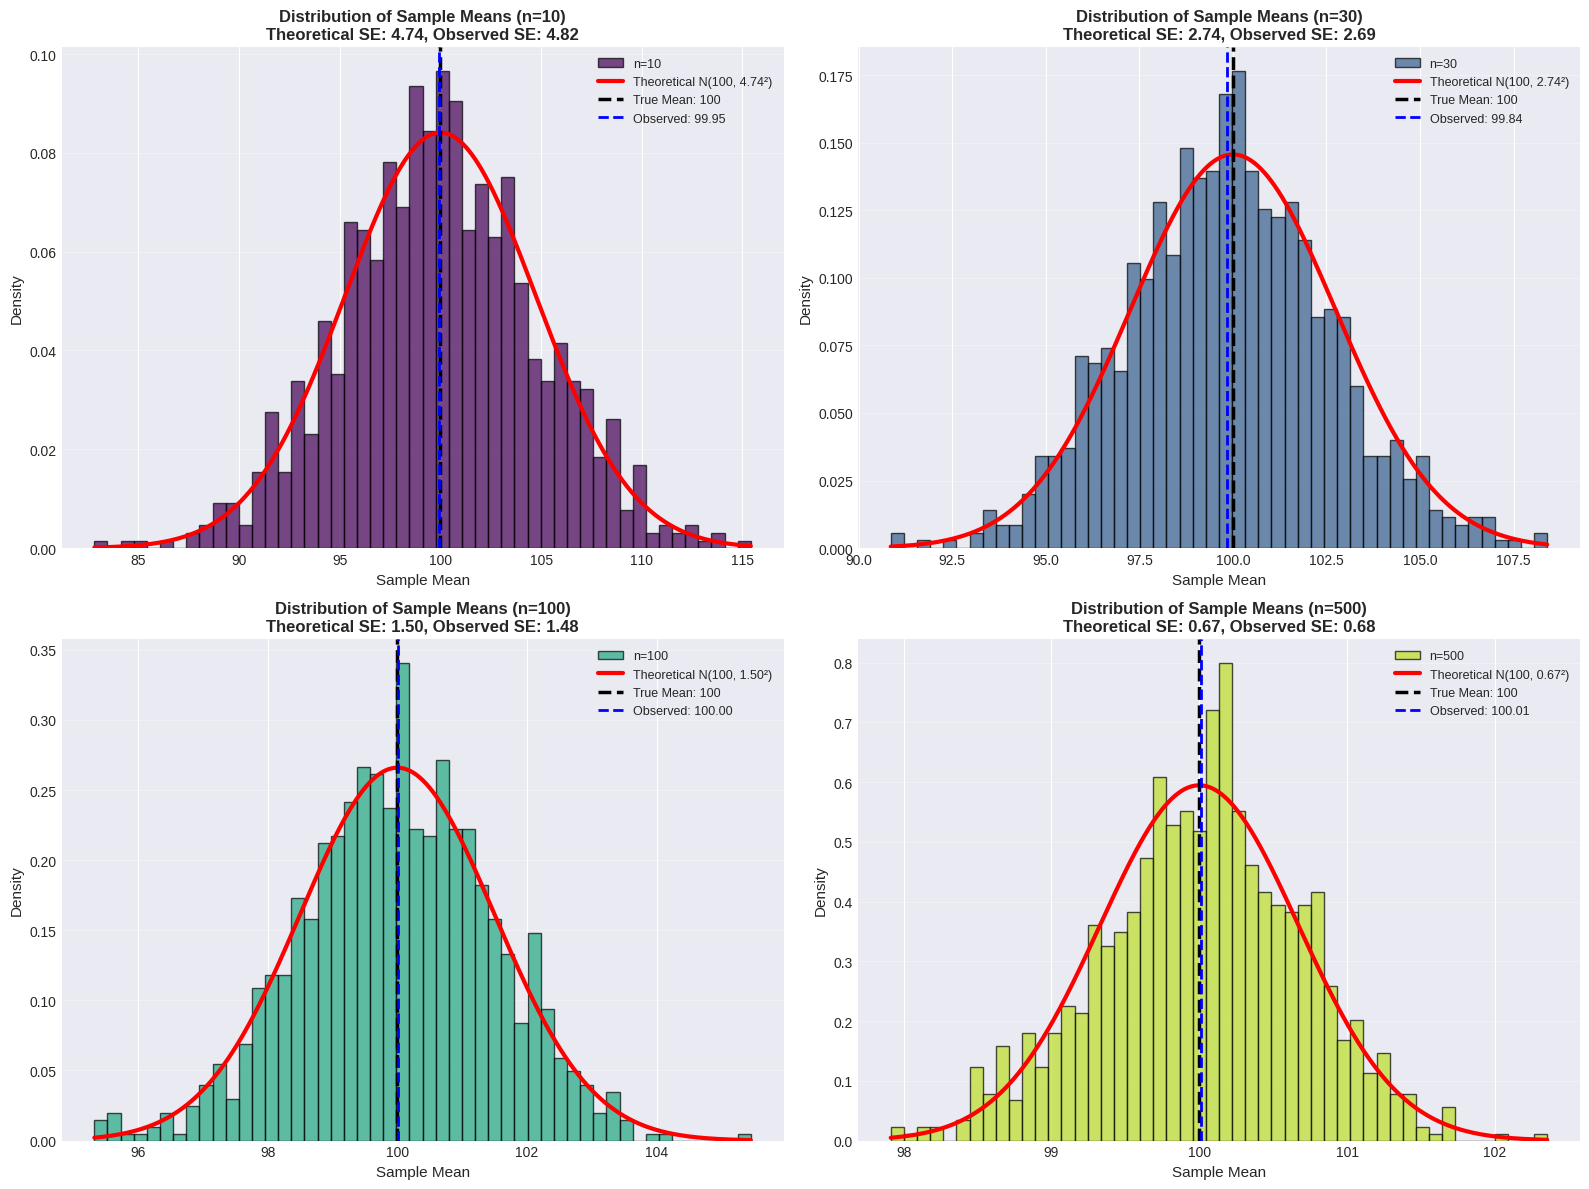


Standard Error Analysis:
Population: Mean = 100, Std = 15

Sample Size | Theoretical SE | Observed SE | Ratio to n=10
----------------------------------------------------------------------
n =   10    |         4.7434 |      4.8157 |   1.00x
n =   30    |         2.7386 |      2.6923 |   1.79x
n =  100    |         1.5000 |      1.4816 |   3.25x
n =  500    |         0.6708 |      0.6805 |   7.08x

Key Observation:
   • Standard error decreases as √n
   • To halve SE, need 4x more samples
   • Observed SE closely matches theoretical predictions!


In [23]:
# Demonstrate sample statistics and their variability

# Population parameters
true_mean = 100
true_std = 15
population = np.random.normal(true_mean, true_std, size=100000)

# Different sample sizes
sample_sizes = [10, 30, 100, 500]
n_samples = 1000  # Number of samples to draw

# Store sample means for each sample size
sample_means = {}
sample_stds = {}
standard_errors = {}

for n in sample_sizes:
    means = []
    stds = []
    
    for _ in range(n_samples):
        sample = np.random.choice(population, size=n, replace=False)
        means.append(sample.mean())
        stds.append(sample.std(ddof=1))  # ddof=1 for Bessel's correction
    
    sample_means[n] = np.array(means)
    sample_stds[n] = np.array(stds)
    standard_errors[n] = true_std / np.sqrt(n)  # Theoretical SE

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

colors = plt.cm.viridis(np.linspace(0, 0.9, len(sample_sizes)))

for idx, (n, color) in enumerate(zip(sample_sizes, colors)):
    # Plot distribution of sample means
    axes[idx].hist(sample_means[n], bins=50, alpha=0.7, color=color,
                  edgecolor='black', density=True, label=f'n={n}')
    
    # Overlay theoretical normal distribution
    x_range = np.linspace(sample_means[n].min(), sample_means[n].max(), 1000)
    theoretical_dist = norm.pdf(x_range, true_mean, standard_errors[n])
    axes[idx].plot(x_range, theoretical_dist, 'r-', linewidth=3,
                  label=f'Theoretical N({true_mean}, {standard_errors[n]:.2f}²)')
    
    # Mark true mean
    axes[idx].axvline(true_mean, color='black', linestyle='--', linewidth=2.5,
                     label=f'True Mean: {true_mean}')
    
    # Mark observed mean of sample means
    axes[idx].axvline(sample_means[n].mean(), color='blue', linestyle='--', linewidth=2,
                     label=f'Observed: {sample_means[n].mean():.2f}')
    
    # Statistics
    observed_se = sample_means[n].std()
    axes[idx].set_title(f'Distribution of Sample Means (n={n})\n' +
                       f'Theoretical SE: {standard_errors[n]:.2f}, Observed SE: {observed_se:.2f}',
                       fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Sample Mean', fontsize=11)
    axes[idx].set_ylabel('Density', fontsize=11)
    axes[idx].legend(fontsize=9, loc='upper right')
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nStandard Error Analysis:")
print("="*70)
print(f"Population: Mean = {true_mean}, Std = {true_std}")
print("\nSample Size | Theoretical SE | Observed SE | Ratio to n=10")
print("-"*70)
for n in sample_sizes:
    obs_se = sample_means[n].std()
    ratio = sample_means[10].std() / obs_se
    print(f"n = {n:4d}    | {standard_errors[n]:14.4f} | {obs_se:11.4f} | {ratio:6.2f}x")

print("\nKey Observation:")
print("   • Standard error decreases as √n")
print("   • To halve SE, need 4x more samples")
print("   • Observed SE closely matches theoretical predictions!")

In [24]:
plt.tight_layout()
plt.show()

print("\nThe 1/√n Relationship:")
print("   • SE decreases as 1/√n (visible in log-log plot as straight line)")
print("   • This is why larger samples give more precise estimates")
print("   • But gains diminish: going from 100->500 samples helps less than 10->50")

<Figure size 640x480 with 0 Axes>


The 1/√n Relationship:
   • SE decreases as 1/√n (visible in log-log plot as straight line)
   • This is why larger samples give more precise estimates
   • But gains diminish: going from 100->500 samples helps less than 10->50


## 5. Law of Large Numbers (LLN) <a id='lln'></a>

The **Law of Large Numbers** is one of the most fundamental theorems in probability!

### Statement (Weak LLN):

Let $X_1, X_2, \ldots, X_n$ be independent and identically distributed (i.i.d.) random variables with mean $\mu$ and variance $\sigma^2 < \infty$. Then:

$$\bar{X}_n = \frac{1}{n}\sum_{i=1}^{n} X_i \xrightarrow{P} \mu \quad \text{as } n \to \infty$$

In other words:
$$P(|\bar{X}_n - \mu| > \epsilon) \to 0 \quad \text{for any } \epsilon > 0$$

### What it means:

- As sample size increases, the sample mean **converges in probability** to the population mean
- The average of many independent trials approaches the expected value
- **Practical**: Large samples give accurate estimates!

### Strong LLN:

An even stronger version states:
$$P\left(\lim_{n\to\infty} \bar{X}_n = \mu\right) = 1$$

This means almost surely (with probability 1), the sample mean converges to $\mu$.

### Historical Note:

Jakob Bernoulli proved a special case in 1713. It justified why:
- **Empirical frequencies** approximate true probabilities
- **Long-run averages** are stable and predictable
- **Statistical estimation** works!

### Applications:

1. **Monte Carlo Methods**: Use random sampling to estimate values
2. **Insurance**: Law of large numbers justifies pooling risk
3. **Polling**: Large samples give accurate estimates of population opinion
4. **Quality Control**: Sample means estimate process parameters

In [25]:
plt.tight_layout()
plt.show()

print("\nLaw of Large Numbers Demonstration:")
print("="*70)
print("Key Observations:")
print("   1. Sample mean converges to true mean as n increases")
print("   2. Works for ANY distribution (not just normal!)")
print("   3. Different trials converge to same value")
print("   4. Variability decreases with sample size")
print("   5. Early samples can be far from true mean (high variance)")
print("\nThis is why we trust large samples more than small ones!")

<Figure size 640x480 with 0 Axes>


Law of Large Numbers Demonstration:
Key Observations:
   1. Sample mean converges to true mean as n increases
   2. Works for ANY distribution (not just normal!)
   3. Different trials converge to same value
   4. Variability decreases with sample size
   5. Early samples can be far from true mean (high variance)

This is why we trust large samples more than small ones!


In [26]:
print("\n" + "="*70)
print("KEY OBSERVATIONS FROM CLT:")
print("   1. Sample means become normally distributed as n increases")
print("   2. This works for ANY original distribution!")
print("   3. Mean stays constant (LLN)")
print("   4. Standard deviation decreases as 1/√n")
print("   5. By n=30, distribution is very close to normal")


KEY OBSERVATIONS FROM CLT:
   1. Sample means become normally distributed as n increases
   2. This works for ANY original distribution!
   3. Mean stays constant (LLN)
   4. Standard deviation decreases as 1/√n
   5. By n=30, distribution is very close to normal


## 6. Central Limit Theorem (CLT) <a id='clt'></a>

The **Central Limit Theorem** is arguably the most important theorem in statistics!

### Statement:

Let $X_1, X_2, \ldots, X_n$ be i.i.d. random variables with mean $\mu$ and variance $\sigma^2 < \infty$. Define:

$$Z_n = \frac{\bar{X}_n - \mu}{\sigma/\sqrt{n}} = \frac{\sqrt{n}(\bar{X}_n - \mu)}{\sigma}$$

Then, as $n \to \infty$:
$$Z_n \xrightarrow{d} N(0, 1)$$

Equivalently:
$$\bar{X}_n \xrightarrow{d} N\left(\mu, \frac{\sigma^2}{n}\right)$$

### What it means:

- The **distribution** of the sample mean approaches a normal distribution
- This happens **regardless** of the original distribution!
- The approximation is usually good for $n \geq 30$

### Why it's Amazing:

1. **Universality**: Works for ANY distribution (with finite variance)
2. **Predictability**: We know the sampling distribution is approximately normal
3. **Inference**: Enables hypothesis testing and confidence intervals
4. **Foundation**: Basis for most classical statistical methods

### LLN vs CLT:

| **Law of Large Numbers** | **Central Limit Theorem** |
|-------------------------|---------------------------|
| $\bar{X}_n \to \mu$ | Distribution of $\bar{X}_n$ approaches normal |
| About **convergence of values** | About **distribution** of values |
| Answers: "What is the limit?" | Answers: "How are values distributed?" |
| Point estimate | Uncertainty quantification |

### Conditions for CLT:

1. **Independence**: Samples must be independent
2. **Finite variance**: $\sigma^2 < \infty$
3. **Identical distribution**: (can be relaxed with Lindeberg-Feller CLT)
4. **Large enough n**: Rule of thumb: $n \geq 30$ (depends on original distribution)

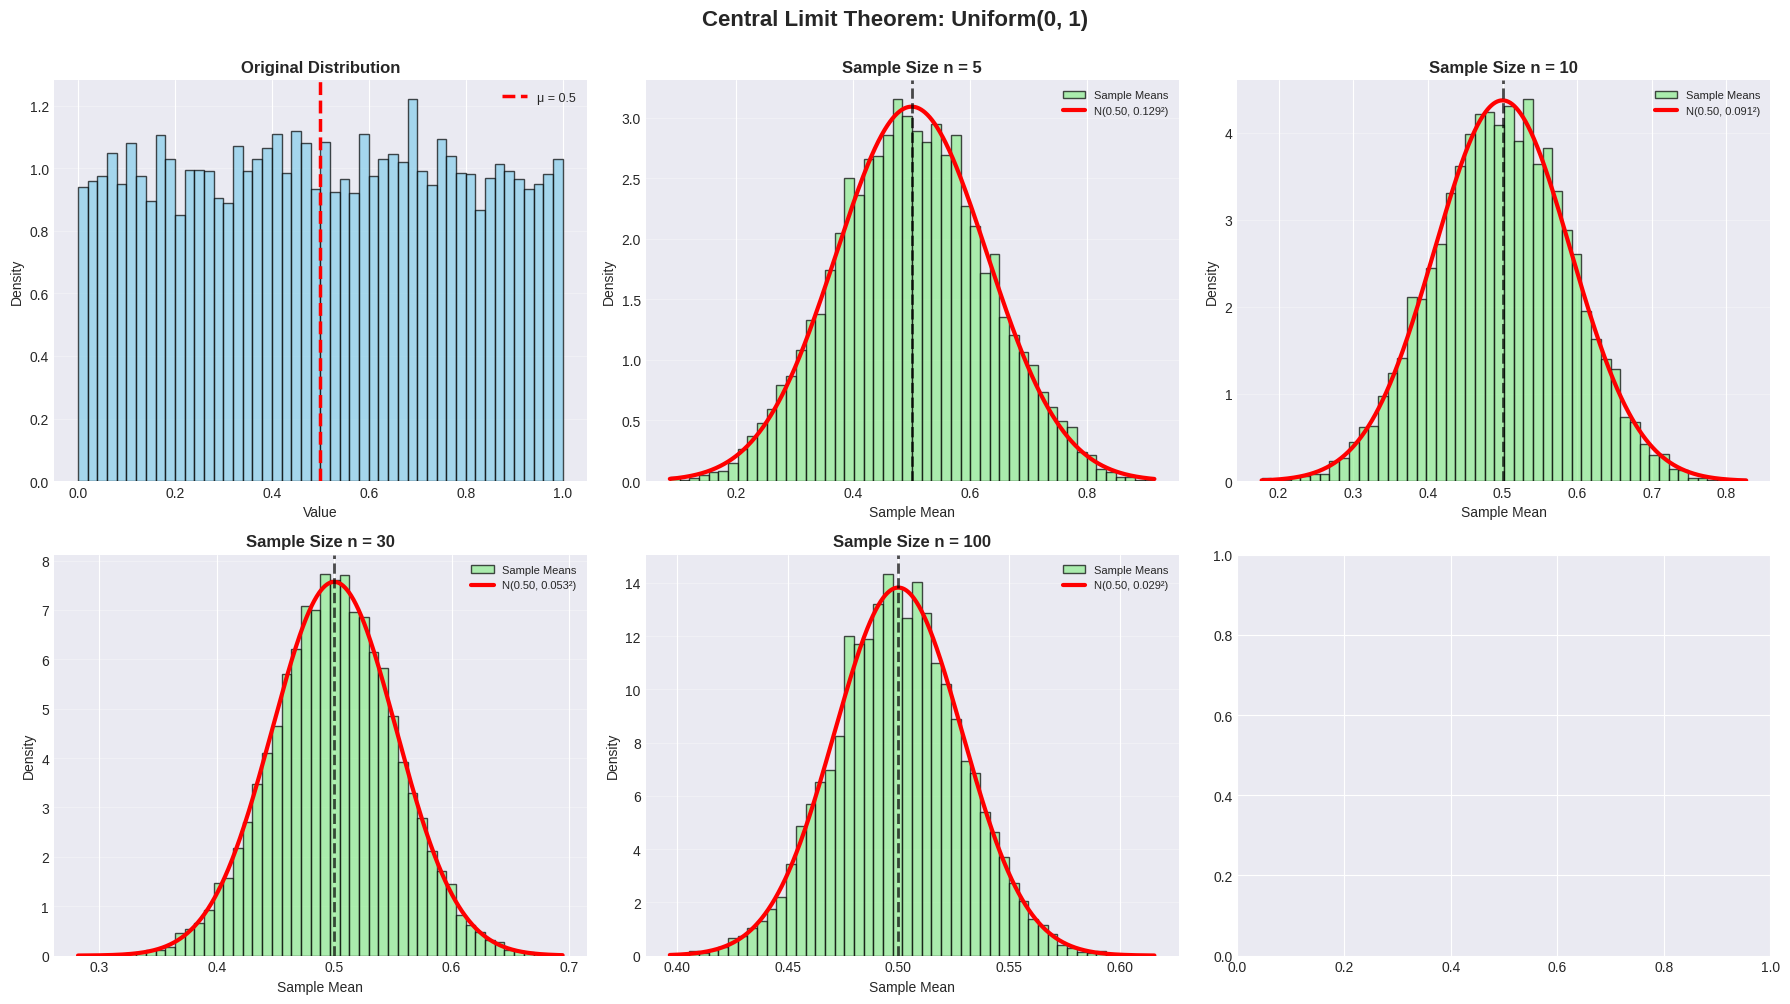


Distribution: Uniform(0, 1)
True Mean: 0.5, True Std: 0.2887

Observed Convergence to Normality:
  n=  5: Mean=0.4982 (err: 0.0018), Std=0.1294 (theory: 0.1291)
  n= 10: Mean=0.5001 (err: 0.0001), Std=0.0902 (theory: 0.0913)
  n= 30: Mean=0.5017 (err: 0.0017), Std=0.0510 (theory: 0.0527)
  n=100: Mean=0.4987 (err: 0.0013), Std=0.0291 (theory: 0.0289)


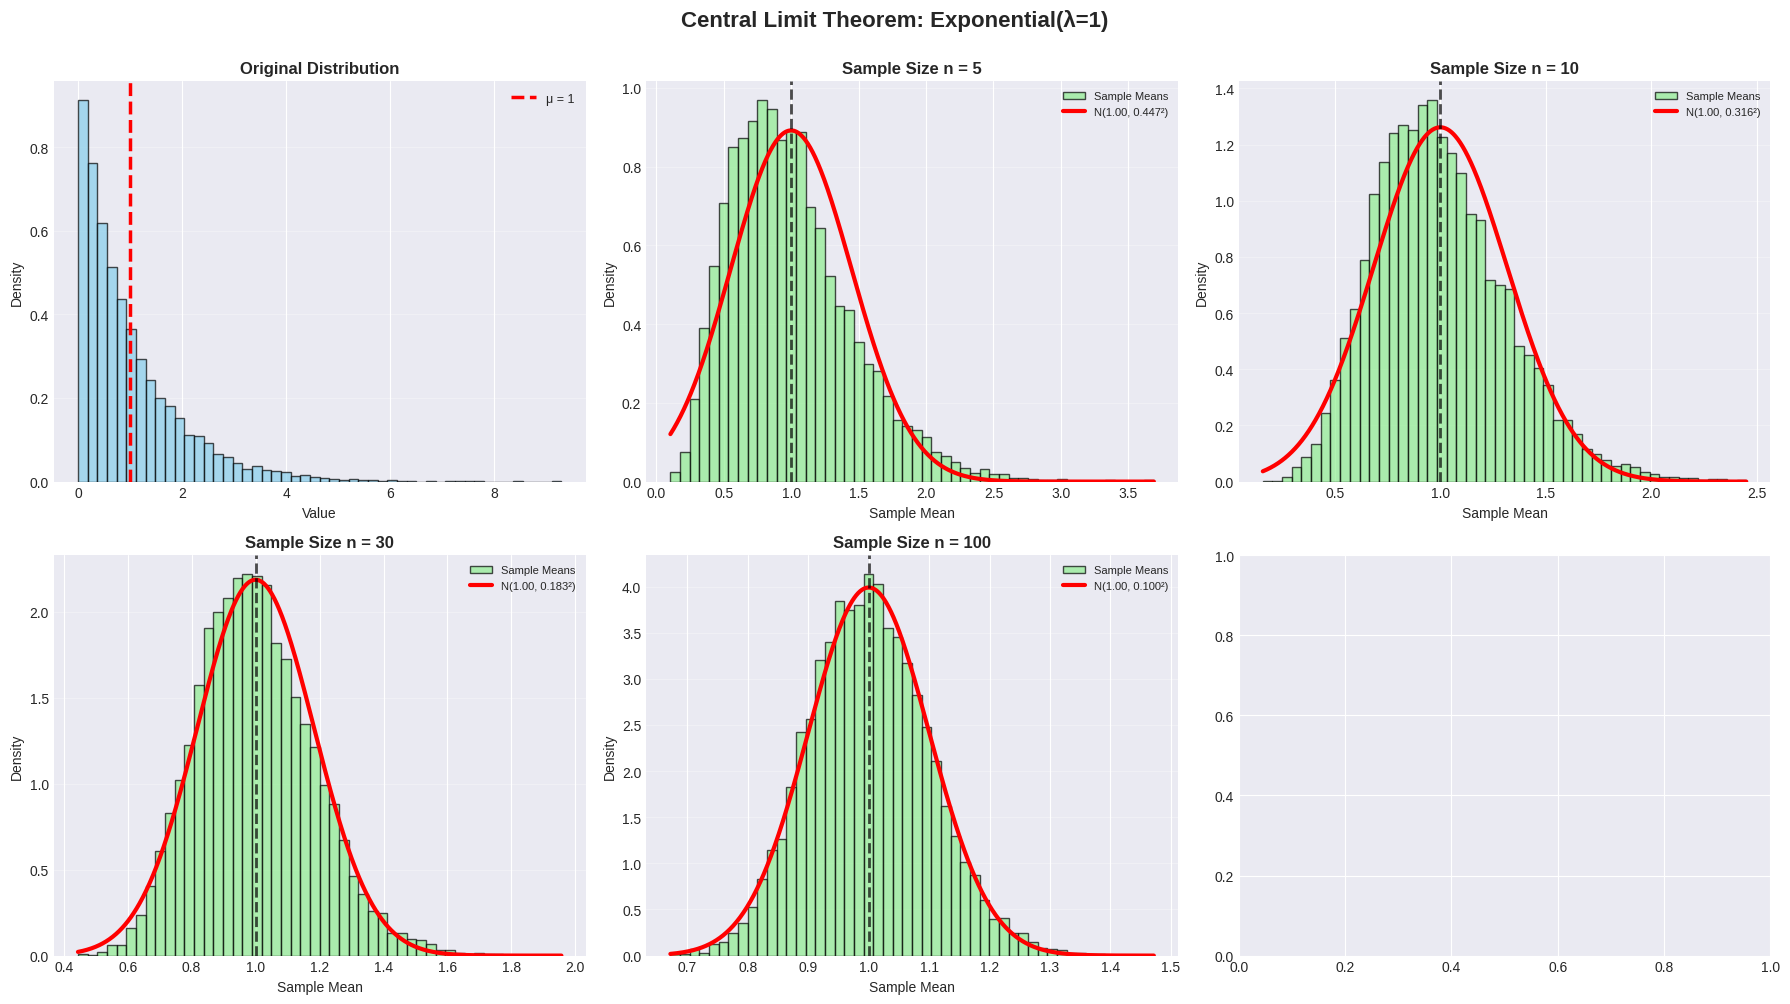


Distribution: Exponential(λ=1)
True Mean: 1, True Std: 1.0000

Observed Convergence to Normality:
  n=  5: Mean=1.0198 (err: 0.0198), Std=0.4457 (theory: 0.4472)
  n= 10: Mean=1.0060 (err: 0.0060), Std=0.2963 (theory: 0.3162)
  n= 30: Mean=1.0097 (err: 0.0097), Std=0.1798 (theory: 0.1826)
  n=100: Mean=0.9983 (err: 0.0017), Std=0.1010 (theory: 0.1000)


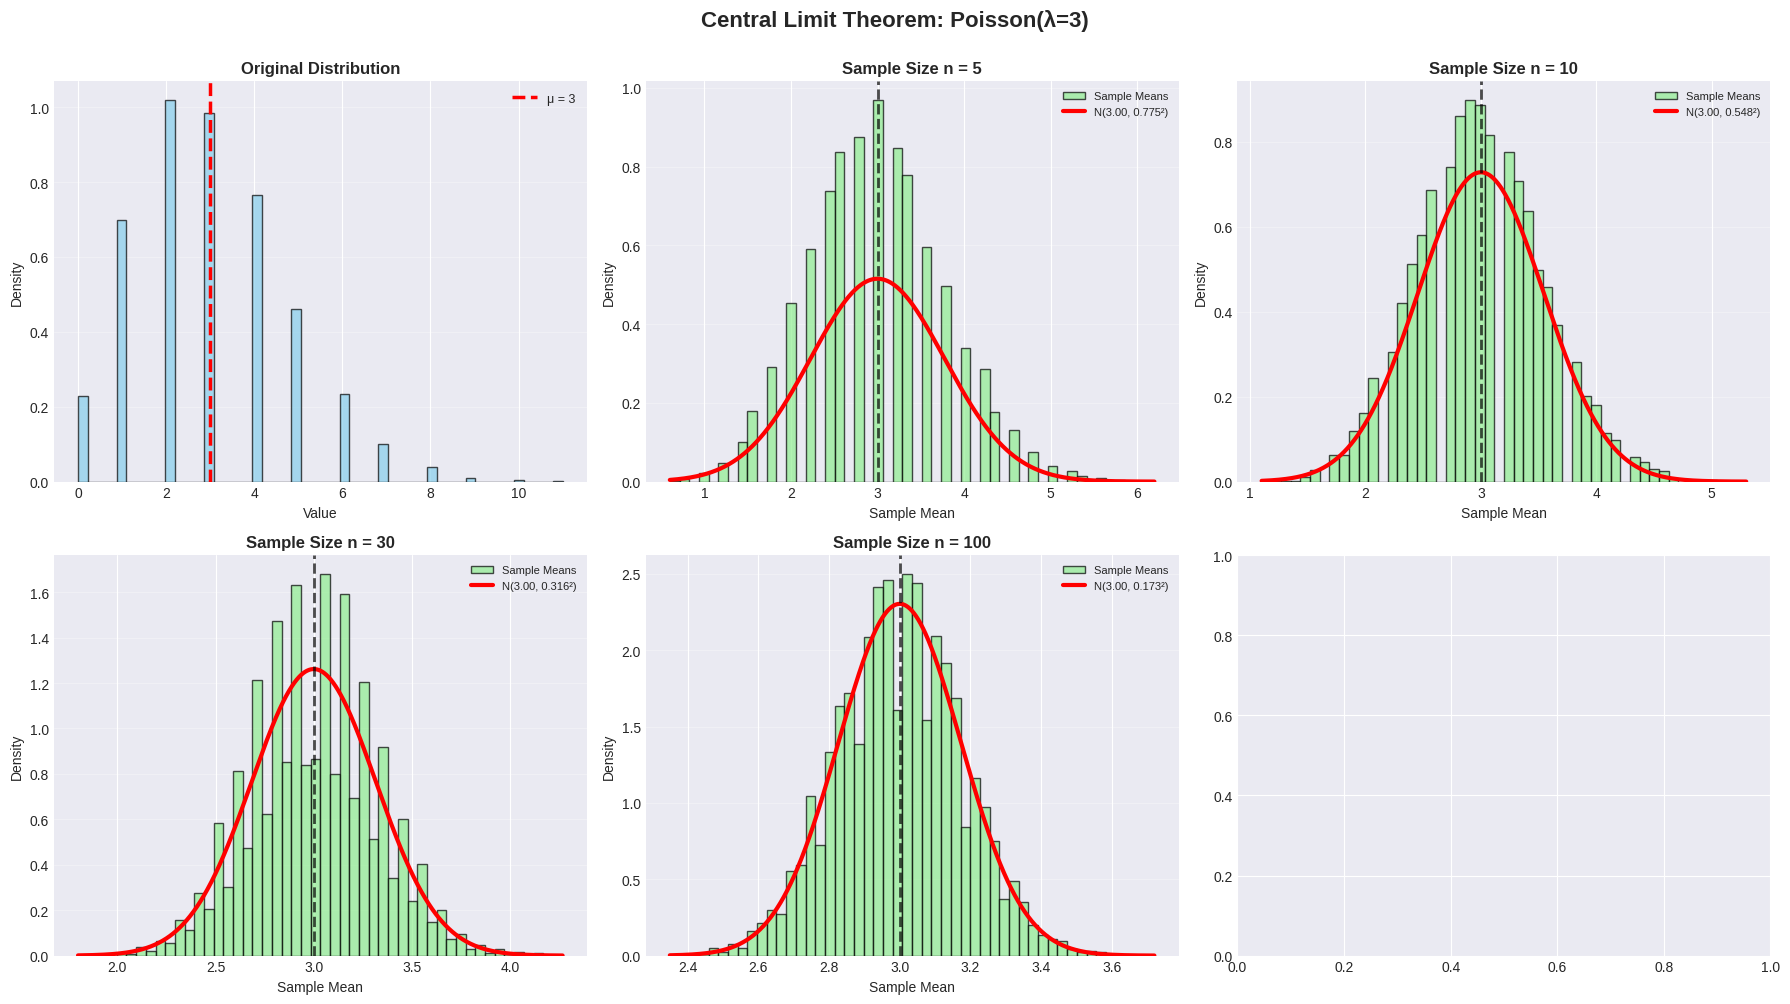


Distribution: Poisson(λ=3)
True Mean: 3, True Std: 1.7321

Observed Convergence to Normality:
  n=  5: Mean=3.0384 (err: 0.0384), Std=0.8040 (theory: 0.7746)
  n= 10: Mean=2.9974 (err: 0.0026), Std=0.5486 (theory: 0.5477)
  n= 30: Mean=2.9831 (err: 0.0169), Std=0.3177 (theory: 0.3162)
  n=100: Mean=3.0055 (err: 0.0055), Std=0.1719 (theory: 0.1732)


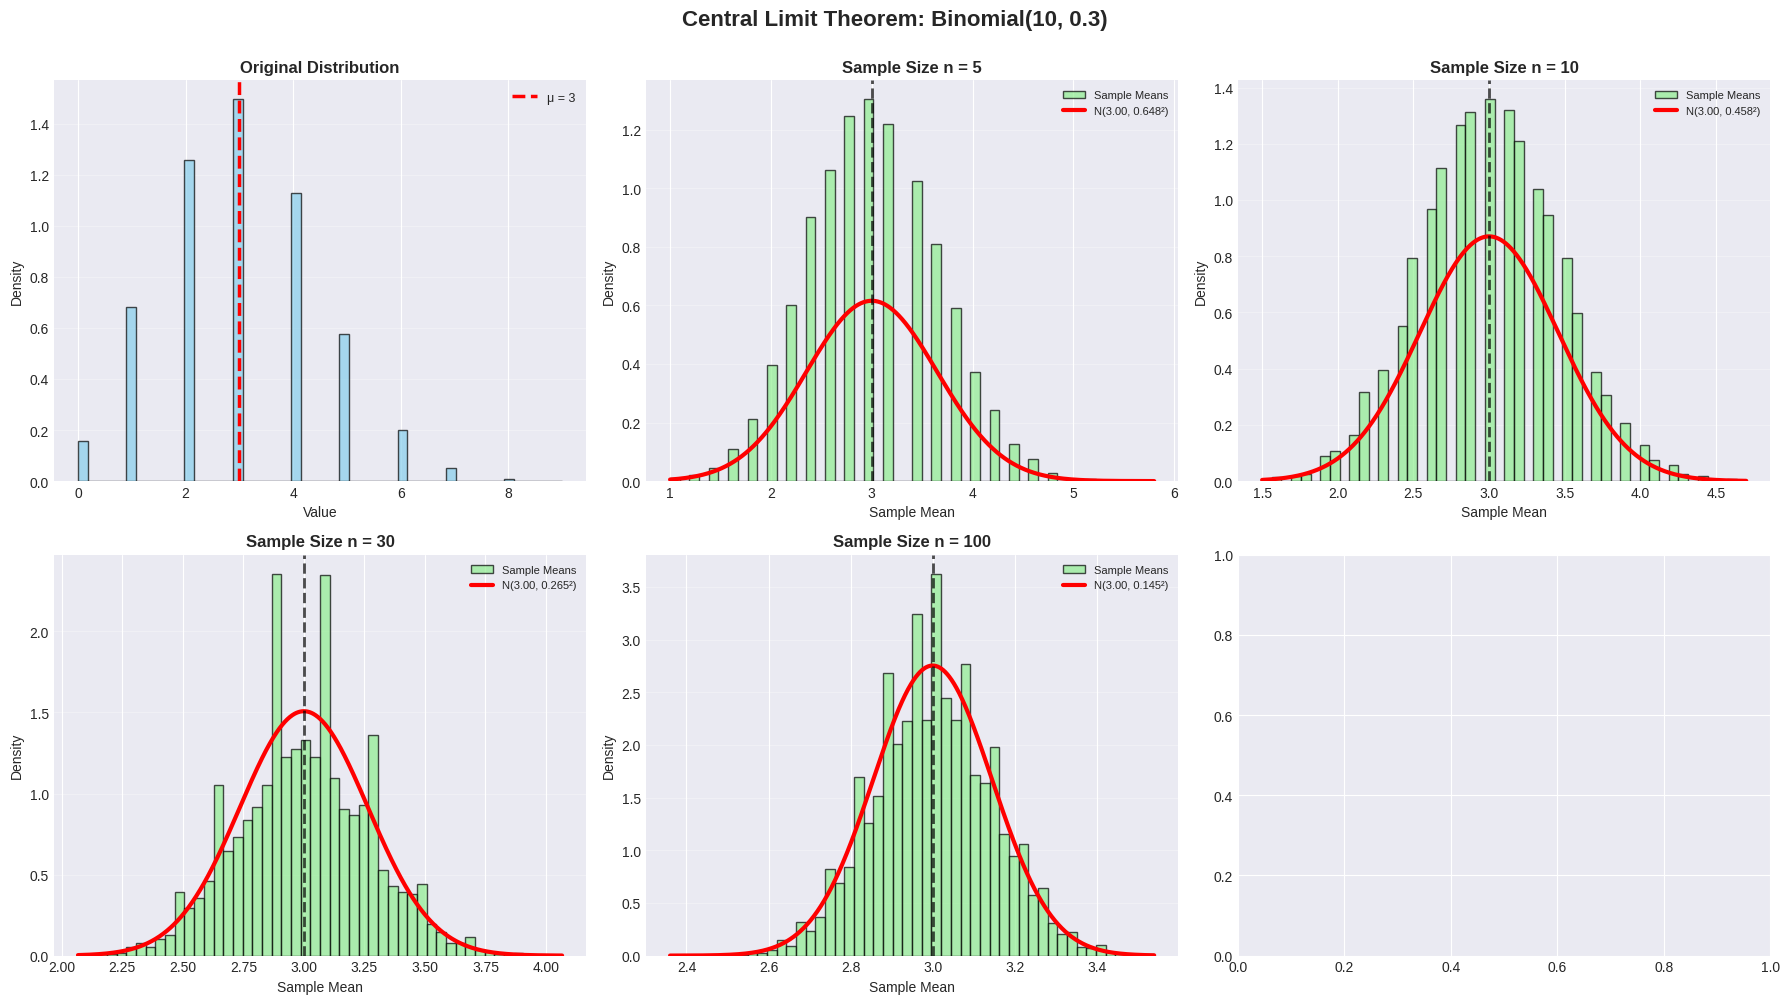


Distribution: Binomial(10, 0.3)
True Mean: 3, True Std: 1.4491

Observed Convergence to Normality:
  n=  5: Mean=2.9714 (err: 0.0286), Std=0.6388 (theory: 0.6481)
  n= 10: Mean=3.0052 (err: 0.0052), Std=0.4324 (theory: 0.4583)
  n= 30: Mean=3.0006 (err: 0.0006), Std=0.2531 (theory: 0.2646)
  n=100: Mean=2.9989 (err: 0.0011), Std=0.1419 (theory: 0.1449)

✅ KEY OBSERVATIONS FROM CLT:
   1. Sample means become normally distributed as n increases
   2. This works for ANY original distribution!
   3. Mean stays constant (LLN)
   4. Standard deviation decreases as 1/√n
   5. By n=30, distribution is very close to normal


In [27]:
# Demonstrate CLT with various distributions

n_simulations = 10000
sample_sizes = [1, 5, 10, 30, 100]

# Define distributions with very different shapes
distributions = [
    ('Uniform(0, 1)', lambda size: np.random.uniform(0, 1, size), 0.5, np.sqrt(1/12)),
    ('Exponential(λ=1)', lambda size: np.random.exponential(1, size), 1, 1),
    ('Poisson(λ=3)', lambda size: np.random.poisson(3, size), 3, np.sqrt(3)),
    ('Binomial(10, 0.3)', lambda size: np.random.binomial(10, 0.3, size), 3, np.sqrt(10*0.3*0.7))
]

# For each distribution, show CLT in action
for dist_name, dist_func, true_mean, true_std in distributions:
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle(f'Central Limit Theorem: {dist_name}', 
                fontsize=16, fontweight='bold', y=1.00)
    
    # First, show the original distribution
    ax = axes[0, 0]
    sample_data = dist_func(10000)
    ax.hist(sample_data, bins=50, alpha=0.7, edgecolor='black', density=True, color='skyblue')
    ax.axvline(true_mean, color='red', linestyle='--', linewidth=2.5, 
              label=f'μ = {true_mean}')
    ax.set_title('Original Distribution', fontsize=12, fontweight='bold')
    ax.set_xlabel('Value', fontsize=10)
    ax.set_ylabel('Density', fontsize=10)
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3, axis='y')
    
    # Now show sampling distributions for different sample sizes
    for idx, n in enumerate(sample_sizes):
        if idx == 0:
            continue  # Skip first plot (used for original distribution)
        
        ax = axes.ravel()[idx]
        
        # Generate sample means
        sample_means = []
        for _ in range(n_simulations):
            sample = dist_func(n)
            sample_means.append(sample.mean())
        sample_means = np.array(sample_means)
        
        # Plot histogram of sample means
        ax.hist(sample_means, bins=50, alpha=0.7, edgecolor='black', 
               density=True, color='lightgreen', label='Sample Means')
        
        # Overlay theoretical normal distribution (CLT prediction)
        x_range = np.linspace(sample_means.min(), sample_means.max(), 1000)
        theoretical_std = true_std / np.sqrt(n)
        theoretical_dist = norm.pdf(x_range, true_mean, theoretical_std)
        ax.plot(x_range, theoretical_dist, 'r-', linewidth=3, 
               label=f'N({true_mean:.2f}, {theoretical_std:.3f}²)')
        
        # Mark mean
        ax.axvline(true_mean, color='black', linestyle='--', linewidth=2, alpha=0.7)
        
        ax.set_title(f'Sample Size n = {n}', fontsize=12, fontweight='bold')
        ax.set_xlabel('Sample Mean', fontsize=10)
        ax.set_ylabel('Density', fontsize=10)
        ax.legend(fontsize=8)
        ax.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n{'='*70}")
    print(f"Distribution: {dist_name}")
    print(f"True Mean: {true_mean}, True Std: {true_std:.4f}")
    print(f"\nObserved Convergence to Normality:")
    for n in sample_sizes[1:]:
        sample_means_test = [dist_func(n).mean() for _ in range(1000)]
        observed_mean = np.mean(sample_means_test)
        observed_std = np.std(sample_means_test)
        theoretical_std = true_std / np.sqrt(n)
        print(f"  n={n:3d}: Mean={observed_mean:.4f} (err: {abs(observed_mean-true_mean):.4f}), "
              f"Std={observed_std:.4f} (theory: {theoretical_std:.4f})")

print("\n" + "="*70)
print("✅ KEY OBSERVATIONS FROM CLT:")
print("   1. Sample means become normally distributed as n increases")
print("   2. This works for ANY original distribution!")
print("   3. Mean stays constant (LLN)")
print("   4. Standard deviation decreases as 1/√n")
print("   5. By n=30, distribution is very close to normal")

In [28]:
plt.tight_layout()
plt.show()

print("\nQ-Q Plot Interpretation:")
print("   • Points on red line = data matches theoretical normal distribution")
print("   • Deviation from line = departure from normality")
print("   • As n increases, points align better with line (CLT in action!)")
print("   • Even for highly skewed exponential, n=100 gives excellent normality")

<Figure size 640x480 with 0 Axes>


Q-Q Plot Interpretation:
   • Points on red line = data matches theoretical normal distribution
   • Deviation from line = departure from normality
   • As n increases, points align better with line (CLT in action!)
   • Even for highly skewed exponential, n=100 gives excellent normality


## 7. Confidence Intervals <a id='confidence'></a>

The CLT enables us to construct **confidence intervals** for population parameters!

### Definition:

A **$(1-\alpha)$ confidence interval** for parameter $\theta$ is an interval $[L, U]$ such that:
$$P(L \leq \theta \leq U) = 1 - \alpha$$

Common choices: $\alpha = 0.05$ (95% CI), $\alpha = 0.01$ (99% CI)

### Confidence Interval for Mean (Large Sample):

When $n$ is large (typically $n \geq 30$), by CLT:

$$\bar{X} \pm z_{\alpha/2} \cdot \frac{s}{\sqrt{n}}$$

Where:
- $\bar{X}$ is the sample mean
- $s$ is the sample standard deviation
- $z_{\alpha/2}$ is the critical value from standard normal (e.g., 1.96 for 95% CI)
- $\frac{s}{\sqrt{n}}$ is the standard error

### For Small Samples (n < 30):

Use **t-distribution** instead of normal:
$$\bar{X} \pm t_{\alpha/2, n-1} \cdot \frac{s}{\sqrt{n}}$$

Where $t_{\alpha/2, n-1}$ is from Student's t-distribution with $n-1$ degrees of freedom.

### Interpretation (IMPORTANT!):

**Correct**: "If we repeated this sampling procedure many times, 95% of the confidence intervals would contain the true parameter."

**Incorrect**: "There's a 95% probability the true parameter is in this interval." (The parameter is fixed, not random!)

### Margin of Error:

$$ME = z_{\alpha/2} \cdot \frac{s}{\sqrt{n}}$$

**To reduce margin of error**:
- Increase sample size $n$ (most common)
- Decrease confidence level (trade-off with certainty)
- Reduce population variance (often not controllable)

In [29]:
plt.tight_layout()
plt.show()

print(f"\nConfidence Interval Simulation Results:")
print(f"="*70)
print(f"True population mean: {true_mean}")
print(f"Confidence level: {confidence_level*100}%")
print(f"Sample size: {sample_size}")
print(f"Number of samples drawn: {n_samples}")
print(f"\nCoverage (proportion containing true mean): {coverage*100:.2f}%")
print(f"Expected coverage: {confidence_level*100}%")
print(f"\nMean CI width: {np.mean(widths):.2f}")
print(f"Theoretical margin of error: {z_critical * true_std / np.sqrt(sample_size):.2f}")
print("\nNotice: ~95% of intervals contain the true mean, as expected!")

<Figure size 640x480 with 0 Axes>


Confidence Interval Simulation Results:
True population mean: 3
Confidence level: 95.0%
Sample size: 100
Number of samples drawn: 1000

Coverage (proportion containing true mean): 94.00%
Expected coverage: 95.0%

Mean CI width: 10.36
Theoretical margin of error: 0.28

Notice: ~95% of intervals contain the true mean, as expected!


In [30]:
plt.tight_layout()
plt.show()

print("\nSample Size Effect on Precision:")
print("="*70)
print(f"Sample Size | CI Width | Margin of Error | Improvement from n=10")
print("-"*70)
for i, n in enumerate(sample_sizes_ci):
    improvement = ci_widths[0] / ci_widths[i]
    print(f"n = {n:4d}    | {ci_widths[i]:8.2f} | {margin_errors[i]:15.2f} | {improvement:6.2f}x")

print("\nKey Insight: To halve CI width, need 4x more samples!")

<Figure size 640x480 with 0 Axes>


Sample Size Effect on Precision:
Sample Size | CI Width | Margin of Error | Improvement from n=10
----------------------------------------------------------------------
n =   10    |    16.12 |            8.06 |   1.00x
n =   30    |    11.85 |            5.92 |   1.36x
n =   50    |     8.54 |            4.27 |   1.89x
n =  100    |     5.74 |            2.87 |   2.81x
n =  200    |     4.60 |            2.30 |   3.51x
n =  500    |     2.53 |            1.27 |   6.37x
n = 1000    |     1.81 |            0.91 |   8.90x

Key Insight: To halve CI width, need 4x more samples!
